In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.ion()
%matplotlib widget

In [2]:
def get_joule_per_pulse(EOM_min, avg_power_w_pulse, pulse_sep):
    avg_power_from_pulse = (avg_power_w_pulse - EOM_min)/1000 
    num_pulses_per_second = 1/(pulse_sep*1e-9)
    return (avg_power_from_pulse/num_pulses_per_second)*1e12

In [3]:
pJ = get_joule_per_pulse(26.2, 43.1, 50)
print(f"pJ: {pJ}")

pJ: 845.0000000000001


In [4]:
pJ = get_joule_per_pulse(0.0021, 0.02, 50)
print(f"pJ: {pJ}")

pJ: 0.8949999999999999


In [5]:
def peak_power_pulse(power_per_pulse):
    return power_per_pulse/300

In [6]:
peak = peak_power_pulse(850)
print(f"peak: {peak}")


peak: 2.8333333333333335


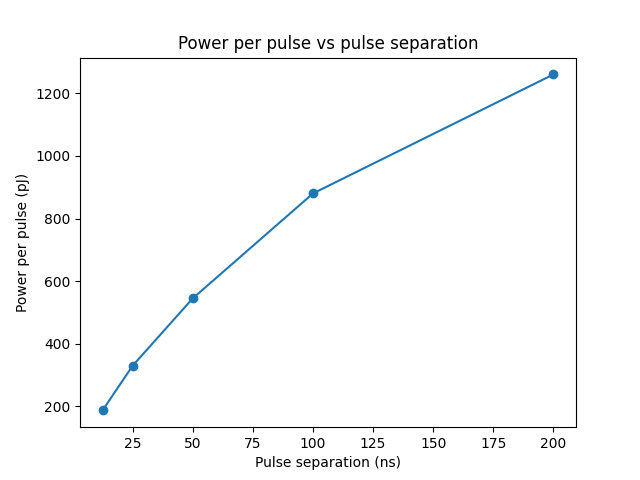

In [7]:
EOM_min = 14 # mW
EOM_max = 36 # mW

avg_power_pulse_sep = np.array([29, 27.2, 24.9, 22.8, 20.3]) # mW
pulse_separation = np.array([12.5, 25, 50, 100, 200]) # ns

avg_power_from_pulse = (avg_power_pulse_sep - EOM_min)/1000 # J/s

num_pulses_per_second = 1/(pulse_separation*1e-9)

power_per_pulse = (avg_power_from_pulse/num_pulses_per_second)*1e12 # pJ/pulse

plt.figure()
plt.plot(pulse_separation, power_per_pulse, 'o-')
plt.xlabel('Pulse separation (ns)')
plt.ylabel('Power per pulse (pJ)')
plt.title('Power per pulse vs pulse separation')
plt.show()


In [8]:
num_pulses_per_second

array([80000000., 40000000., 20000000., 10000000.,  5000000.])

In [9]:
# poweramp at 100mA

power_per_pulse = get_joule_per_pulse(1.36, 2.63, 50)

print(f'Power per pulse: {power_per_pulse} pJ')

Power per pulse: 63.499999999999986 pJ


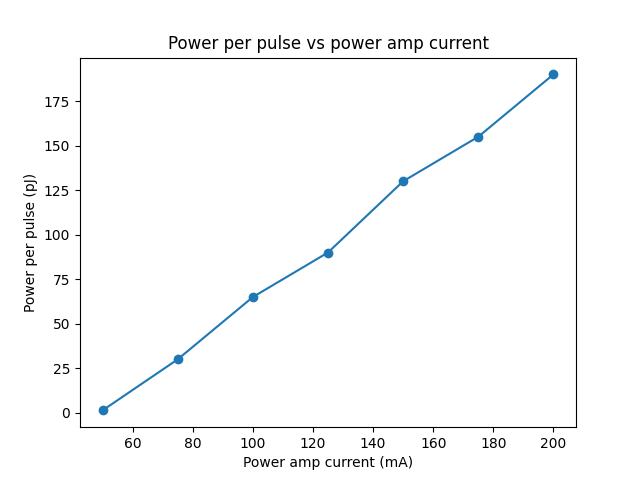

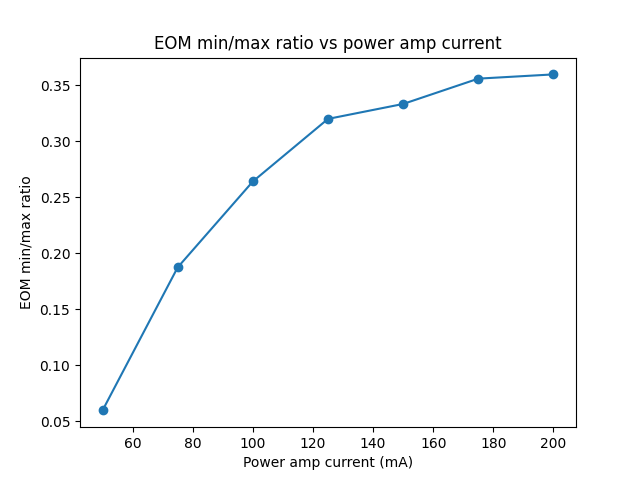

In [10]:
# poweramp sweep

power_amp_current = np.array([50, 75, 100, 125, 150, 175, 200]) # mA
avg_power_w_pulse = np.array([0.1, 1.2, 2.7, 4.2, 5.8, 7.3, 8.8]) # mW
EOM_max = np.array([1.22, 3.2, 5.3, 7.5, 9.6, 11.8, 13.9]) # mW
EOM_min= np.array([0.073, 0.6, 1.4, 2.4, 3.2, 4.2, 5]) # mW

power_per_pulse = get_joule_per_pulse(EOM_min, avg_power_w_pulse, 50)
ration_min_max = EOM_min/EOM_max

plt.figure()
plt.plot(power_amp_current, power_per_pulse, 'o-')
plt.xlabel('Power amp current (mA)')
plt.ylabel('Power per pulse (pJ)')
plt.title('Power per pulse vs power amp current')
plt.show()

plt.figure()
plt.plot(power_amp_current, ration_min_max, 'o-')
plt.xlabel('Power amp current (mA)')
plt.ylabel('EOM min/max ratio')
plt.title('EOM min/max ratio vs power amp current')
plt.show()



In [11]:
power_per_pulse_noEDFA = get_joule_per_pulse(26.8, 43.7, 50)
print('Power per pulse (0.0198 mW):', power_per_pulse_noEDFA, 'pJ')

Power per pulse (0.0198 mW): 845.0000000000001 pJ


In [12]:
peak_power_pulse_noEDFA = peak_power_pulse(power_per_pulse_noEDFA)
print('Peak power per pulse (0.0198 mW):', peak_power_pulse_noEDFA*1e3, 'mW')

Peak power per pulse (0.0198 mW): 2816.666666666667 mW


## Avg. power for sep. sweep

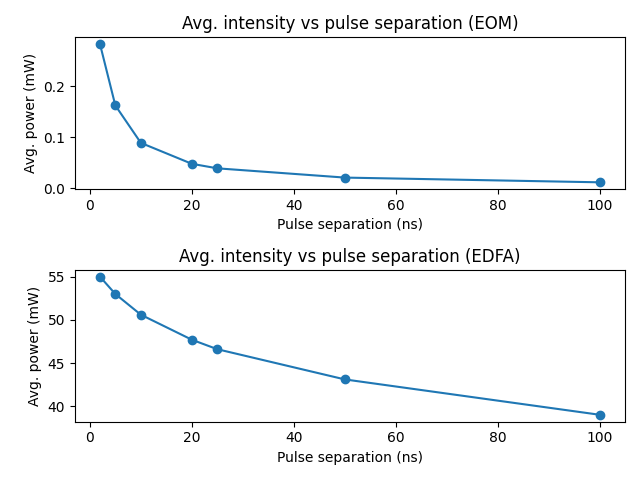

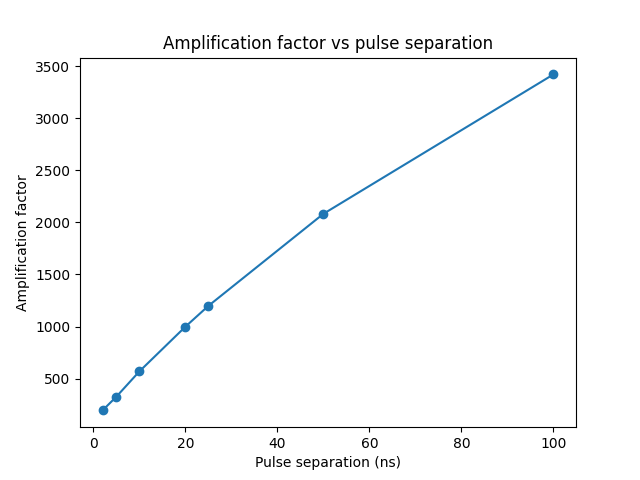

In [14]:
# santec at 10 mW

EOM_sep_sweep = np.array([0.0114, 0.0207, 0.0389, 0.0478, 0.089, 0.1626, 0.283]) # mW
EDFA_sep_sweep = np.array([39, 43.1, 46.6, 47.7, 50.6, 53, 55]) # mW
sep_sweep = np.array([100, 50, 25, 20, 10, 5, 2]) # ns

# Plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(sep_sweep, EOM_sep_sweep, 'o-')
ax[0].set_xlabel('Pulse separation (ns)')
ax[0].set_ylabel('Avg. power (mW)')
ax[0].set_title('Avg. intensity vs pulse separation (EOM)')
ax[1].plot(sep_sweep, EDFA_sep_sweep, 'o-')
ax[1].set_xlabel('Pulse separation (ns)')
ax[1].set_ylabel('Avg. power (mW)')
ax[1].set_title('Avg. intensity vs pulse separation (EDFA)')
plt.tight_layout()
plt.show()

# Get amplification factor
amp_factor = EDFA_sep_sweep/EOM_sep_sweep

plt.figure()
plt.plot(sep_sweep, amp_factor, 'o-')
plt.xlabel('Pulse separation (ns)')
plt.ylabel('Amplification factor')
plt.title('Amplification factor vs pulse separation')
plt.show()

# Convert pulse sep. to avg. power



## Amplification for CW


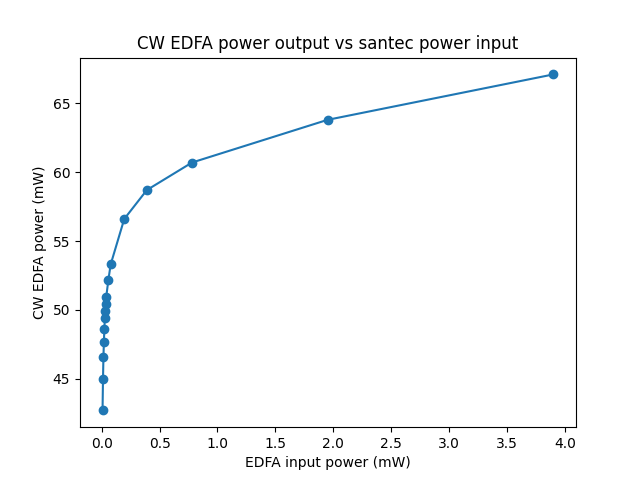

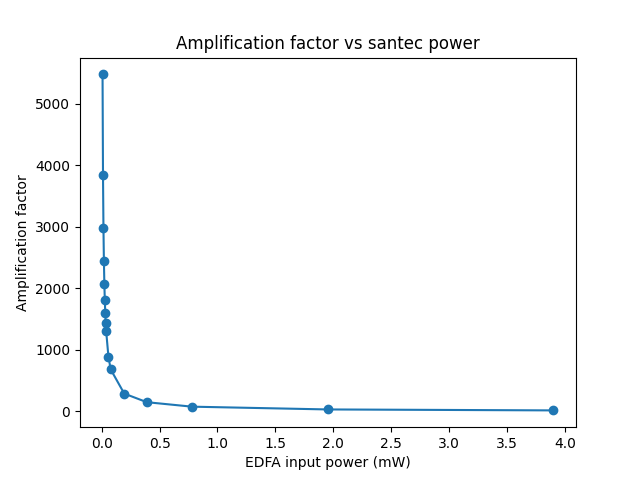

In [15]:
CW_EDFA = np.array([42.7, 45, 46.6, 47.7, 48.6, 49.4, 49.9, 50.4, 50.9, 52.2, 53.3, 56.6, 58.7, 60.7, 63.8, 67.1]) # mW
santec_power = np.array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.5, 1, 2, 5, 10]) # mW
santec_after_EOM = santec_power*0.39

plt.figure()
plt.plot(santec_after_EOM, CW_EDFA, 'o-')
plt.xlabel('EDFA input power (mW)')
plt.ylabel('CW EDFA power (mW)')
plt.title('CW EDFA power output vs santec power input')
plt.show()

# Get amplification factor
amp_factor = CW_EDFA/santec_after_EOM

plt.figure()
plt.plot(santec_after_EOM, amp_factor, 'o-')
plt.xlabel('EDFA input power (mW)')
plt.ylabel('Amplification factor')
plt.title('Amplification factor vs santec power')
plt.show()





## Power per pulse for sep. sweep

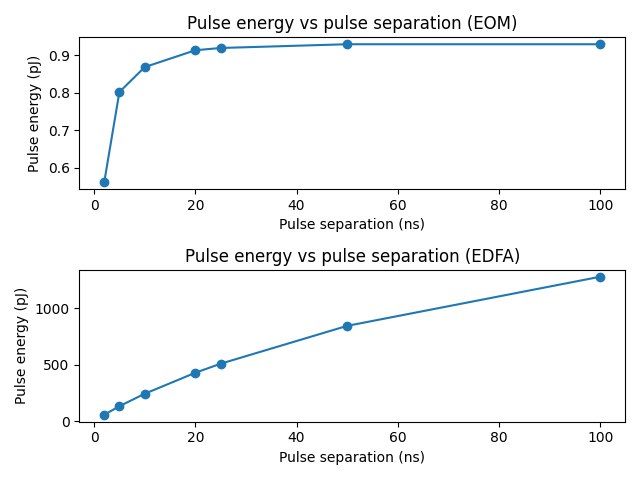

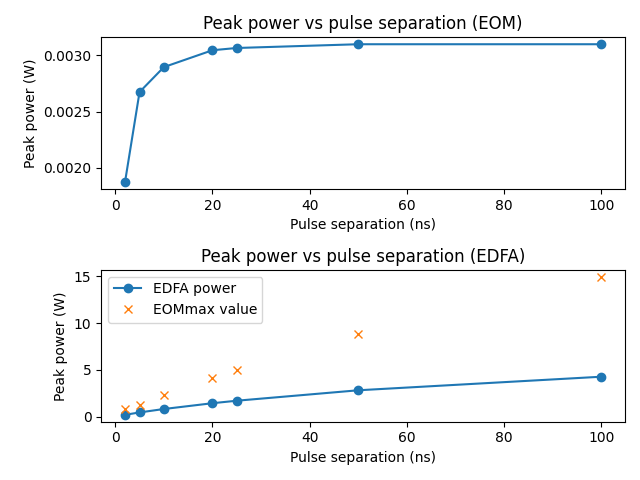

In [16]:
pulse_energy_EOM = get_joule_per_pulse(0.0021, EOM_sep_sweep, sep_sweep)
pulse_energy_EDFA = get_joule_per_pulse(26.2, EDFA_sep_sweep, sep_sweep)

peak_power_pulse_EOM = peak_power_pulse(pulse_energy_EOM)
peak_power_pulse_EDFA = peak_power_pulse(pulse_energy_EDFA)

EOM_max_before_EDFA = 3.8
EOM_min_before_EDFA = 0.0021

EOM_max_after_EDFA = 63
EOM_min_after_EDFA = 26.2

# Interpolate amplification factor
from scipy.interpolate import interp1d

f = interp1d(santec_after_EOM, amp_factor, kind='cubic')

amp_list = f(EOM_sep_sweep)
EOM_max_after_EDFA_pulse = EOM_max_before_EDFA*amp_list / 1000

fig, ax = plt.subplots(2, 1)
ax[0].plot(sep_sweep, pulse_energy_EOM, 'o-')
ax[0].set_xlabel('Pulse separation (ns)')
ax[0].set_ylabel('Pulse energy (pJ)')
ax[0].set_title('Pulse energy vs pulse separation (EOM)')
ax[1].plot(sep_sweep, pulse_energy_EDFA, 'o-')
ax[1].set_xlabel('Pulse separation (ns)')
ax[1].set_ylabel('Pulse energy (pJ)')
ax[1].set_title('Pulse energy vs pulse separation (EDFA)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1)
ax[0].plot(sep_sweep, peak_power_pulse_EOM, 'o-')
ax[0].set_xlabel('Pulse separation (ns)')
ax[0].set_ylabel('Peak power (W)')
ax[0].set_title('Peak power vs pulse separation (EOM)')
ax[1].plot(sep_sweep, peak_power_pulse_EDFA, 'o-', label='EDFA power')
ax[1].plot(sep_sweep, EOM_max_after_EDFA_pulse, 'x', label='EOMmax value')
ax[1].set_xlabel('Pulse separation (ns)')
ax[1].set_ylabel('Peak power (W)')
ax[1].set_title('Peak power vs pulse separation (EDFA)')
ax[1].legend()
plt.tight_layout()
plt.show()




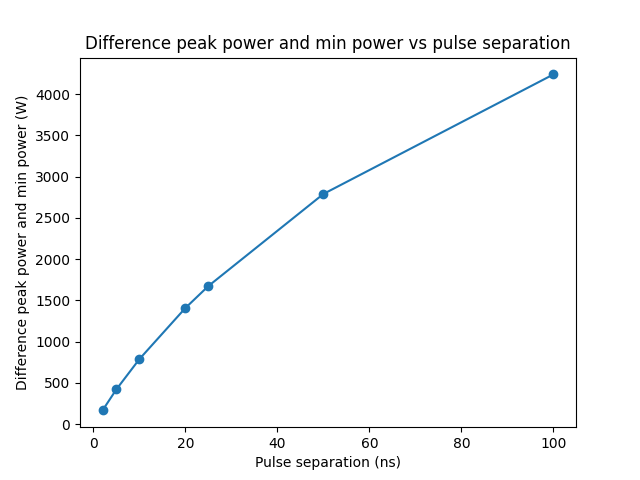

In [17]:
# Difference peak power and min power

diff_peak_power_EDFA_min = peak_power_pulse_EDFA*1e3 - EOM_min_after_EDFA

plt.figure()
plt.plot(sep_sweep, diff_peak_power_EDFA_min, 'o-')
plt.xlabel('Pulse separation (ns)')
plt.ylabel('Difference peak power and min power (W)')
plt.title('Difference peak power and min power vs pulse separation')
plt.show()



In [ ]:
# Why is the peak intenstiy overshooting the EOM max power? The amplification for lower intensities after the EOM is higher than for higher intensities. The peak intesity
# is a low intensity amplified by a factor that can be 1000 times higher than the amplification factor for the EOM max power.
# For a 20 ns pulse, the average amp. is approx. 1000. So if the EOM is carving out a pulse, the EOMmax of 3.7 mW will be amplified to 3.7 W.